In [1]:
from matplotlib import pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import image
import numpy as np
from pathlib import Path
import tensorflow
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense,Flatten,Dropout
from keras.utils import np_utils

In [2]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
#model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0

In [3]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["acc"])

In [4]:
train_gen=image.ImageDataGenerator(rescale=1.0/255)
train_generator= train_gen.flow_from_directory("images",target_size=(100,100),batch_size=64,class_mode="categorical")
val_generator= train_gen.flow_from_directory("images val",target_size=(100,100),batch_size=16,class_mode="categorical")
#X,Y=train_generator.next()
for x,y in train_generator:
    print(x.shape,y.shape)
    break

Found 1292 images belonging to 5 classes.
Found 174 images belonging to 5 classes.
(64, 100, 100, 3) (64, 5)


C:\Users\Saksham Pandey\AppData\Local\Programs\Python\Python37\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [6]:
history=model.fit_generator(train_generator,epochs=10, steps_per_epoch=20,validation_data=val_generator)

Epoch 1/10
20/20 [==============================] - 30s 2s/step - loss: 0.9368 - acc: 0.6344 - val_loss: 0.6231 - val_acc: 0.8218
Epoch 2/10
20/20 [==============================] - 33s 2s/step - loss: 0.6527 - acc: 0.7695 - val_loss: 0.5678 - val_acc: 0.7816
Epoch 3/10
20/20 [==============================] - 34s 2s/step - loss: 0.5190 - acc: 0.8168 - val_loss: 0.4496 - val_acc: 0.8448
Epoch 4/10
20/20 [==============================] - 36s 2s/step - loss: 0.4225 - acc: 0.8594 - val_loss: 0.5920 - val_acc: 0.7759
Epoch 5/10
20/20 [==============================] - 35s 2s/step - loss: 0.3841 - acc: 0.8656 - val_loss: 0.3682 - val_acc: 0.8793
Epoch 6/10
20/20 [==============================] - 35s 2s/step - loss: 0.2851 - acc: 0.9031 - val_loss: 0.3359 - val_acc: 0.8966
Epoch 7/10
20/20 [==============================] - 36s 2s/step - loss: 0.2399 - acc: 0.9169 - val_loss: 0.3343 - val_acc: 0.8851
Epoch 8/10
20/20 [==============================] - 36s 2s/step - loss: 0.2658 - acc: 0.90

In [8]:
image_data=[]
label_dic={}
p=Path("images")
dirs=p.glob("*")
label_data=[]
    
for count,folder in enumerate(dirs):
    label=(str(folder).split("\\")[-1])
    label_dic[label]=count
    for pic in folder.glob("*"):
            img=image.load_img(pic,target_size=(100,100))
            poke_img=image.img_to_array(img)
            image_data.append(poke_img)
            label_data.append(label_dic[label])

    

In [9]:
image_data=np.array(image_data)/255.0
label_data=np.array(label_data)

In [10]:
image_data.shape

(1295, 100, 100, 3)

In [11]:
def draw_img(img):
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show
    return

In [12]:
import random
combine=list(zip(image_data,label_data))
combined=random.shuffle(combine)
image_data[:],label_data[:]=zip(*combine)

3
2
4
1
2
2
0
4
1
2


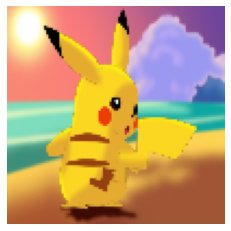

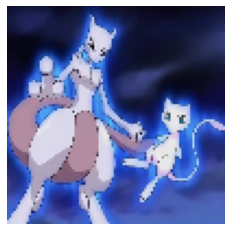

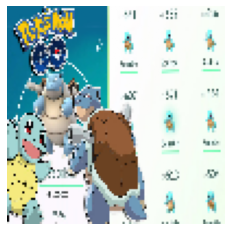

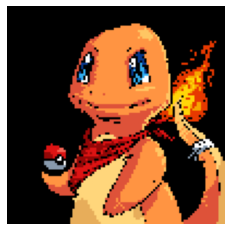

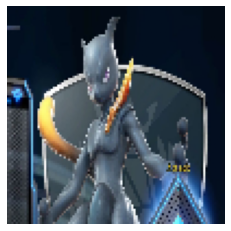

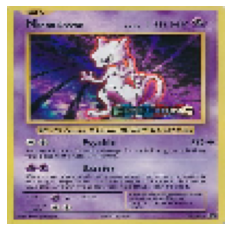

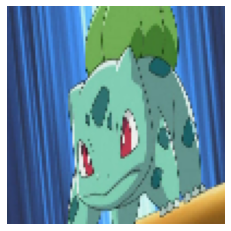

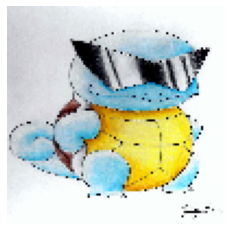

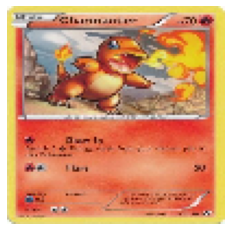

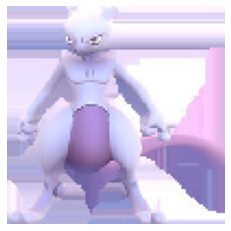

In [13]:
for i in range(10):
    draw_img(image_data[i])
    print(label_data[i])

In [14]:
X_train_CNN=image_data
Y_train_CNN=np_utils.to_categorical(label_data)

In [27]:
image_data_val=[]
label_dic_val={}
p_val=Path("images val")
dirs_val=p_val.glob("*")
label_data_val=[]
    
for count,folder in enumerate(dirs_val):
    label_val=(str(folder).split("\\")[-1])
    label_dic_val[label_val]=count
    for pic in folder.glob("*"):
            img=image.load_img(pic,target_size=(100,100))
            poke_img=image.img_to_array(img)
            image_data_val.append(poke_img)
            label_data_val.append(label_dic[label])

In [28]:
image_data_val=np.array(image_data_val)/255.0
label_data_val=np.array(label_data_val)
import random
combine=list(zip(image_data_val,label_data_val))
combined=random.shuffle(combine)
image_data_val[:],label_data_val[:]=zip(*combine)
label_data_val=np_utils.to_categorical(label_data_val)
print(image_data_val.shape, label_data_val.shape)

(174, 100, 100, 3) (174, 5)


In [29]:
hist=model.fit(X_train_CNN,Y_train_CNN,shuffle=True,epochs=10,batch_size=64, validation_data=(image_data_val,label_data_val))

Epoch 1/10
21/21 [==============================] - 11s 539ms/step - loss: 1.0757 - acc: 0.5714 - val_loss: 3.1722 - val_acc: 0.2011
Epoch 2/10
21/21 [==============================] - 12s 584ms/step - loss: 1.0714 - acc: 0.5853 - val_loss: 3.2122 - val_acc: 0.2011
Epoch 3/10
21/21 [==============================] - 13s 610ms/step - loss: 1.0370 - acc: 0.5876 - val_loss: 3.8243 - val_acc: 0.1667
Epoch 4/10
21/21 [==============================] - 14s 643ms/step - loss: 1.0325 - acc: 0.5737 - val_loss: 3.4823 - val_acc: 0.1782
Epoch 5/10
21/21 [==============================] - 15s 690ms/step - loss: 1.0141 - acc: 0.5876 - val_loss: 3.1679 - val_acc: 0.1782
Epoch 6/10
21/21 [==============================] - 14s 675ms/step - loss: 1.0144 - acc: 0.5799 - val_loss: 3.8056 - val_acc: 0.1667
Epoch 7/10
21/21 [==============================] - 14s 677ms/step - loss: 0.9973 - acc: 0.5815 - val_loss: 3.4866 - val_acc: 0.1782
Epoch 8/10
21/21 [==============================] - 14s 668ms/step - 